In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rho_plus as rp

# if you want dark mode, use is_dark=True instead
theme, cs = rp.mpl_setup(is_dark=False)

# context='talk' makes the text big so it's easy to see
# for your work, you may want to set this to 'notebook' instead
sns.set_context('talk')

In [53]:
from pathlib import Path

base = Path('res') / 'results' / 'ltc'
list(base.iterdir())

[PosixPath('res/results/ltc/ids_train_val_test.json'),
 PosixPath('res/results/ltc/last_model.pt'),
 PosixPath('res/results/ltc/Test_results.json'),
 PosixPath('res/results/ltc/sampletest_data_data_range'),
 PosixPath('res/results/ltc/sampletrain_data_data_range'),
 PosixPath('res/results/ltc/best_model.pt'),
 PosixPath('res/results/ltc/mad'),
 PosixPath('res/results/ltc/current_model.pt'),
 PosixPath('res/results/ltc/config.json'),
 PosixPath('res/results/ltc/sampleval_data_data_range'),
 PosixPath('res/results/ltc/history_train.json'),
 PosixPath('res/results/ltc/prediction_results_test_set.csv'),
 PosixPath('res/results/ltc/history_val.json'),
 PosixPath('res/results/ltc/Train_results.json'),
 PosixPath('res/results/ltc/prediction_results_train_set.csv'),
 PosixPath('res/results/ltc/Val_results.json')]

In [54]:
train = pd.read_csv(base / 'prediction_results_train_set.csv')
val = pd.read_csv(base / 'prediction_results_test_set.csv')

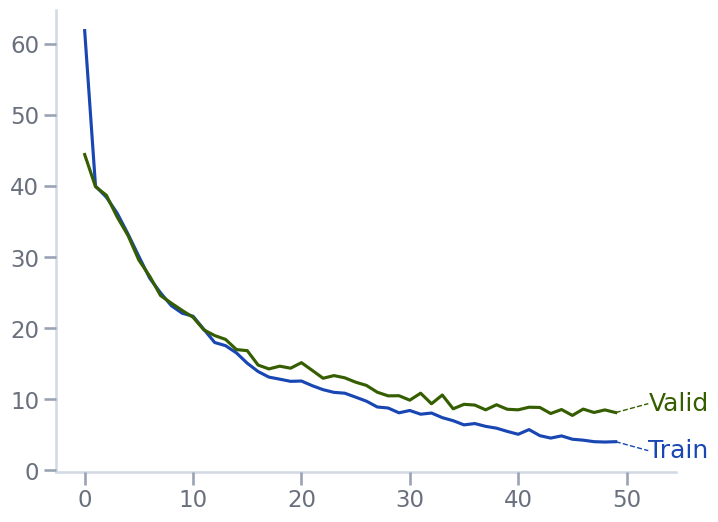

In [55]:
hist = pd.DataFrame({
    'Train': pd.read_json(base / 'history_train.json').values[:, 0],
    'Valid': pd.read_json(base / 'history_val.json').values[:, 0]
})
hist.plot()
rp.line_labels()

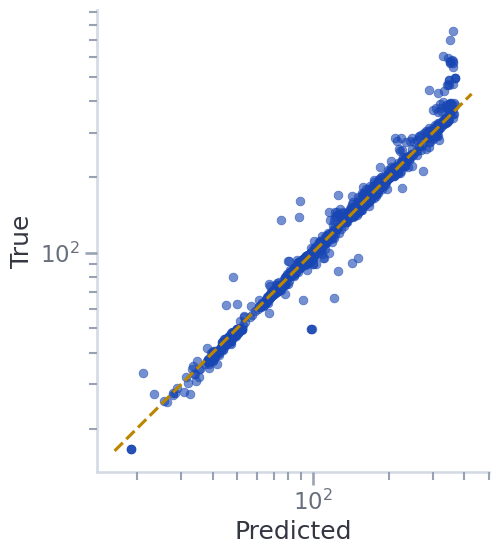

In [62]:
ax = sns.scatterplot(train, x='prediction', y='target', ec=None, s=40, alpha=0.6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_aspect('equal')
sns.despine(ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.plot(ax.get_xlim(), ax.get_xlim(), ls='--', c='C2')